# Analyzing selling price of used cars using Python and Regression Model

The aim of this project is predict the price worth of a car. Using data containing information about the used cars, like their price, color, etc. 

Steps:
- Import packages needed 
- Import the dataset
- Perform EDA on the dataset
- Perform data visualization to understand the data better
- Build the Regression model
- Study the accuracy of the model
- Test the model

Step One: Packages

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp 


Step Two: Import the dataset

In [33]:
file = pd.read_csv('auto.csv')
df=pd.DataFrame(file)
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


we notice that there are no column names , we have to fix that first 

In [34]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration","num-of-doors", "body-style","drive-wheels", "engine-location", "wheel-base","length", "width","height", "curb-weight", "engine-type","num-of-cylinders", "engine-size",  "fuel-system","bore","stroke", "compression-ratio", "horsepower", "peak-rpm","city-mpg","highway-mpg","price"] 

df.columns=headers

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Handeling Missing Data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [36]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [37]:
# to fix normalized column , firts cahnge its type from object to int
df['normalized-losses']=df['normalized-losses'].astype(float)

mean_normalized_losses=df['normalized-losses'].mean()
median_normalized_losses=df['normalized-losses'].median()

print("the mean of stroke column = ",mean_normalized_losses)
print("the median of stroke column = ",median_normalized_losses)


the mean of stroke column =  122.0
the median of stroke column =  115.0


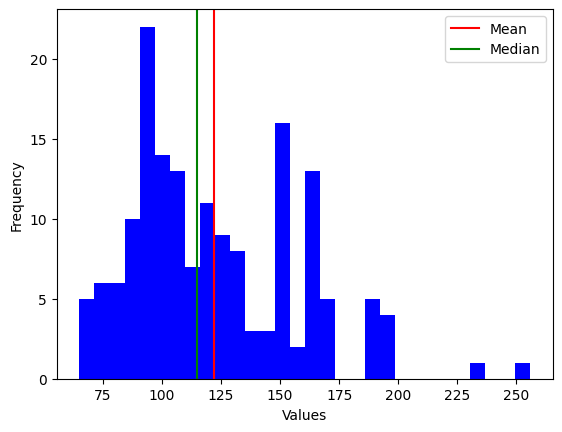

In [38]:
plt.hist(df['normalized-losses'], bins=30, color='blue')

plt.axvline(x=mean_normalized_losses, color='red',  label='Mean')
plt.axvline(x=median_normalized_losses, color='green',  label='Median')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [39]:
#depending on the visualization we notice thatthe right chioce is the mean since data is distributed in a better way median<mean
df['normalized-losses']=df['normalized-losses'].replace(np.nan,mean_normalized_losses)

In [40]:
# number of doors only have 2 missing values, which represent 0.98% of the original data ( out of 204) so we can drop the null values since it doesn't affect the data and other steps
df.dropna(subset=['num-of-doors'], inplace=True)

In [41]:
#for bore, first transform its type to float, then replace it with median sice the mean and median are approximatly close
df['bore']=df['bore'].astype(float)

mean_bore=df['bore'].mean()
median_bore=df['bore'].median()

print("the mean of stroke column = ",mean_bore)
print("the median of stroke column = ",median_bore)


df['bore']=df['bore'].replace(np.nan,median_bore)

the mean of stroke column =  3.3302525252525252
the median of stroke column =  3.31


In [42]:
#for stroke, first transform its type to float, then replace it with mean since it is slightly larger than the median
df['stroke']=df['stroke'].astype(float)

mean_stroke=df['stroke'].mean()
median_stroke=df['stroke'].median()

print("the mean of stroke column = ",mean_stroke)
print("the median of stroke column = ",median_stroke)


df['stroke']=df['stroke'].replace(np.nan,mean_stroke)

the mean of stroke column =  3.2569696969696964
the median of stroke column =  3.29


the mean of price column =  104.435
the median of price column =  95.0


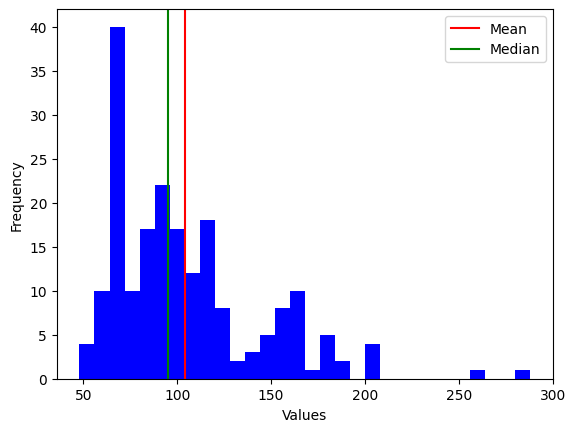

In [43]:
#for horsepower, first transform its type to int, then replace it with median since the mean is bigger that the median and our data is positevly skewed
df['horsepower']=df['horsepower'].astype(float)

mean_horsepower=df['horsepower'].mean()
median_horsepower=df['horsepower'].median()

print("the mean of price column = ",mean_horsepower)
print("the median of price column = ",median_horsepower)

plt.hist(df['horsepower'], bins=30, color='blue')

plt.axvline(x=mean_horsepower, color='red',  label='Mean')
plt.axvline(x=median_horsepower, color='green',  label='Median')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.show()

df['horsepower']=df['horsepower'].replace(np.nan,median_horsepower)

the mean of peace-rpm column =  5126.5
the median of peak-rpm column =  5200.0


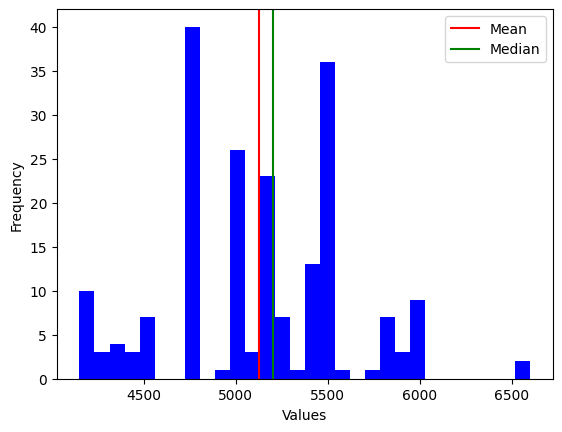

In [44]:
#for peak-rpm, first transform its type to float, we notice that the median is bigger than the mean so the data is negatively skewed, then replace it with mean
df['peak-rpm']=df['peak-rpm'].astype(float)

mean_peak_rpm=df['peak-rpm'].mean()
median_peak_rpm=df['peak-rpm'].median()

print("the mean of peace-rpm column = ",mean_peak_rpm)
print("the median of peak-rpm column = ",median_peak_rpm)

plt.hist(df['peak-rpm'], bins=30, color='blue')

plt.axvline(x=mean_peak_rpm, color='red',  label='Mean')
plt.axvline(x=median_peak_rpm, color='green',  label='Median')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.show()

df['peak-rpm']=df['peak-rpm'].replace(np.nan,mean_peak_rpm)

In [45]:
# for price column, first transform its type from object to float, then replace the misiing value with median sice the mean is smaller than the median so the data is negatively skewed

df['price']=df['price'].astype(float)
mean_price=df['price'].mean()

print("the mean of price column = ",mean_price)
print("the median of price column = ",df['price'].median())

df['price']=df['price'].replace(np.nan,mean_price)

the mean of price column =  13241.338383838383
the median of price column =  10270.0


Now, we fix the data types in order to further the work with the data

In [46]:
df[['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']]=df[['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']].astype('string')

df['num-of-doors'].value_counts().unique

map_nb_doors = {'four': 4, 'two': 2}

df['num-of-doors']=df['num-of-doors'].map(map_nb_doors)
df['num-of-doors']=df['num-of-doors'].astype(int)

df['num-of-cylinders'].value_counts().unique

map_nb_cylinder = {'four': 4, 'two': 2,'six': 6, 'five':5, 'eight': 8, 'three': 3, 'twelve': 12}

df['num-of-cylinders']=df['num-of-cylinders'].map(map_nb_cylinder)
df['num-of-cylinders']=df['num-of-cylinders'].astype(int)



In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  202 non-null    float64
 2   make               202 non-null    string 
 3   fuel-type          202 non-null    string 
 4   aspiration         202 non-null    string 
 5   num-of-doors       202 non-null    int32  
 6   body-style         202 non-null    string 
 7   drive-wheels       202 non-null    string 
 8   engine-location    202 non-null    string 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    string 
 15  num-of-cylinders   202 non-null    int32  
 16  engine-size        202 non-null

After that, we are going to bin the price column into 3 catergories : Low, Medium, High ; using smoothing by means


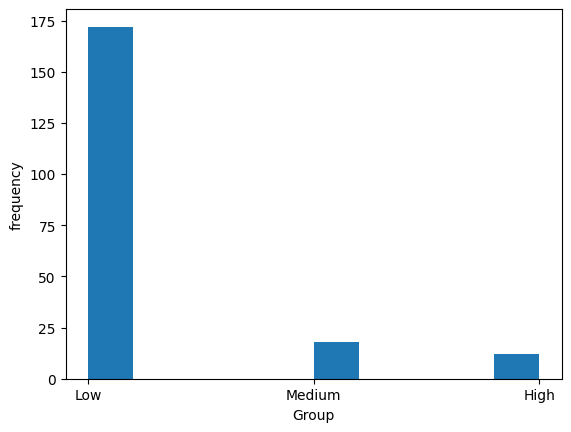

In [48]:
bins_price = np.linspace(min(df['price']), max(df['price']), 4)

group_names=['Low', 'Medium', 'High']

df['price_binned'] = pd.cut(df['price'],bins=bins_price, labels= group_names, include_lowest=True)

plt.hist(df['price_binned'])

plt.xlabel('Group')
plt.ylabel('frequency')

plt.show()


Then, we need to study the relation between the columns and the class 'price'

In [49]:
# In order to understand the data better
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.826733,121.871287,3.128713,98.831683,174.139604,65.924257,53.755941,2557.965347,4.386139,127.059406,3.329851,3.256970,10.098614,104.341584,5126.500000,25.193069,30.717822,13241.338384
std,1.243762,31.863566,0.994146,6.013061,12.364039,2.151791,2.423638,523.854860,1.087883,41.900456,0.271838,0.313019,3.897109,39.719128,478.542304,6.539383,6.886758,7918.561021
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,2.000000,94.500000,166.425000,64.125000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7778.250000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10470.000000
75%,2.000000,137.000000,4.000000,102.400000,183.400000,66.900000,55.500000,2947.750000,4.000000,144.000000,3.587500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


                price  engine-size  highway-mpg  peak-rpm    stroke
price        1.000000     0.861549    -0.694076 -0.100506  0.085146
engine-size  0.861549     1.000000    -0.682525 -0.243718  0.207491
highway-mpg -0.694076    -0.682525     1.000000 -0.047084 -0.053026
peak-rpm    -0.100506    -0.243718    -0.047084  1.000000 -0.069475
stroke       0.085146     0.207491    -0.053026 -0.069475  1.000000


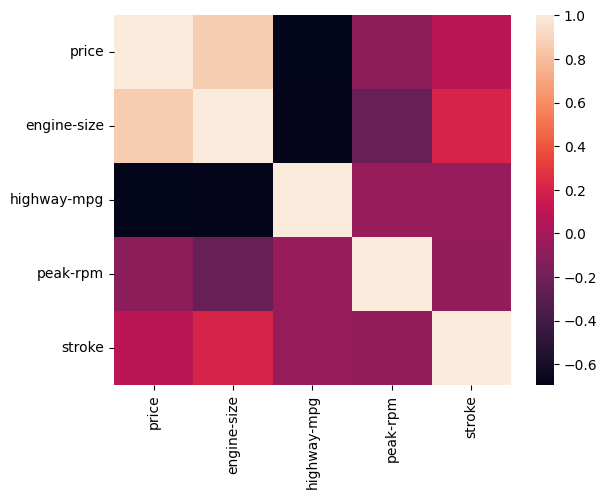

In [50]:
corr_pearson=df[['price','engine-size','highway-mpg', 'peak-rpm', 'stroke']].corr(method='pearson')
print(corr_pearson)
heatmap_pearson= sns.heatmap(data=corr_pearson)

We notice the highest correlation is between the 'price' and 'engine size', and after the visulization of scatter plot we notice it is a strong positive correlation

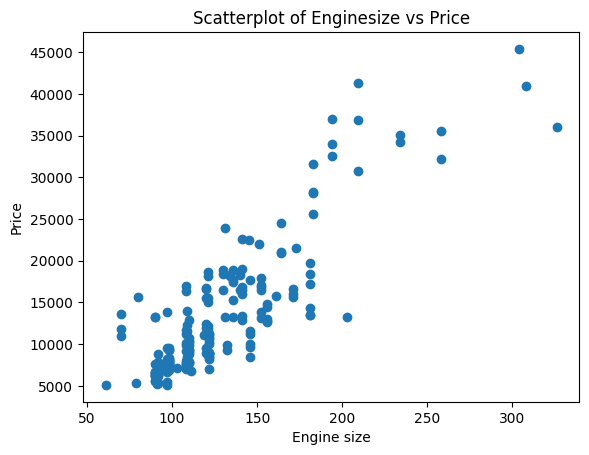

In [51]:
plt.scatter(df['engine-size'], df['price']) 
plt.title('Scatterplot of Enginesize vs Price') 
plt.xlabel('Engine size') 
plt.ylabel('Price') 
plt.show() 

In [52]:
combination=['drive-wheels','body-style']
values_combination=df.groupby(combination)['price'].mean().sort_values()
print(values_combination," \n so the car having rwd drive wheels with convertible body style is the most expensive")

drive-wheels  body-style 
fwd           hardtop         8249.000000
              hatchback       8396.387755
4wd           wagon           9095.750000
fwd           sedan           9941.430487
              wagon           9997.333333
4wd           hatchback      10422.169192
fwd           convertible    11595.000000
4wd           sedan          12647.333333
rwd           hatchback      14280.070441
              wagon          16994.222222
              sedan          21711.833333
              hardtop        24202.714286
              convertible    26563.250000
Name: price, dtype: float64  
 so the car having rwd drive wheels with convertible body style is the most expensive
